In [ ]:
!pip install ripser
!pip install pandas
!pip install matplotlib
!pip install hdf5storage
!pip install h5py
!pip install scipy

In [ ]:
from tqdm.notebook import trange, tqdm
import numpy as np
from scipy.spatial.distance import jensenshannon
from math import inf
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ripser import ripser
from persim import plot_diagrams
from persim import wasserstein
import time
from scipy.stats import f_oneway, ttest_1samp
import itertools
from copy import deepcopy

# Create one diagram

In [ ]:
low_dir = '~/low_conf_33_kmax=40.npy'
hi_dir = '~/hi_conf_33_kmax=40.npy'

In [ ]:
data_low = np.load(low_dir,allow_pickle=True)
data_high = np.load(hi_dir,allow_pickle=True)

In [ ]:
# Sanity Check
print("-"*49)
print("Low Confidence Data...")
print(data_low.shape)
print(data_low[12])
print("-"*49)
print("High Confidence Data...")
print(data_high.shape)
print(data_high[12])
print("-"*49)

-------------------------------------------------
Low Confidence Data...
(33, 63, 40)
[[0.     0.0005 0.2495 ... 0.     0.     0.    ]
 [0.     0.0005 0.243  ... 0.     0.     0.    ]
 [0.     0.0005 0.2235 ... 0.     0.     0.    ]
 ...
 [0.     0.     0.248  ... 0.     0.     0.    ]
 [0.     0.0005 0.2385 ... 0.     0.     0.    ]
 [0.     0.     0.2475 ... 0.     0.     0.    ]]
-------------------------------------------------
High Confidence Data...
(33, 63, 40)
[[0.     0.0005 0.253  ... 0.     0.     0.    ]
 [0.     0.     0.2455 ... 0.     0.     0.    ]
 [0.     0.001  0.222  ... 0.     0.     0.    ]
 ...
 [0.     0.001  0.2525 ... 0.     0.     0.    ]
 [0.     0.0005 0.2255 ... 0.     0.     0.    ]
 [0.     0.0005 0.244  ... 0.     0.     0.    ]]
-------------------------------------------------


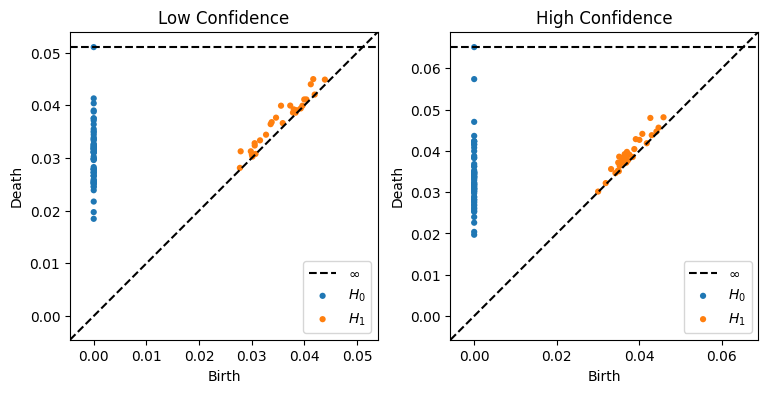

0.03285157678294324


In [ ]:
X_high = data_high[24]
X_low = data_low[24]

# Compute the persistence diagram of this point cloud
dgms_high = ripser(X_high, metric = jensenshannon, coeff=10)['dgms']
dgms_low = ripser(X_low, metric = jensenshannon, coeff=10)['dgms']

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_diagrams(dgms_low)
#plt.scatter(X[:, 0], X[:, 1])
#plt.axis('equal')
plt.title("Low Confidence")
plt.subplot(122)
plt.title("High Confidence")
plot_diagrams(dgms_high)
plt.show()
print(wasserstein(dgms_high[1], dgms_low[1]))

In [ ]:
dgms[1]

array([[0.0470948 , 0.05077226],
       [0.04477371, 0.0467119 ],
       [0.04383344, 0.04495035],
       [0.04262457, 0.04621539],
       [0.04083732, 0.04358562],
       [0.04071473, 0.04258138],
       [0.03999177, 0.0420691 ],
       [0.03944175, 0.04124416],
       [0.03923436, 0.04253309],
       [0.03836234, 0.04061937],
       [0.03823744, 0.04172654],
       [0.03817431, 0.03827959],
       [0.03808884, 0.03814194],
       [0.037898  , 0.04026932],
       [0.03747177, 0.03808817],
       [0.03709279, 0.03899926],
       [0.03672274, 0.03943486],
       [0.03631373, 0.0372441 ],
       [0.03620968, 0.03748909],
       [0.03588863, 0.03697146],
       [0.03558192, 0.0375702 ],
       [0.03464112, 0.03558294],
       [0.03447869, 0.03647186],
       [0.03425705, 0.03881945],
       [0.03410292, 0.03673404],
       [0.0339657 , 0.03730977],
       [0.03396   , 0.03587267],
       [0.03393222, 0.03736784],
       [0.03380794, 0.03421249],
       [0.03366047, 0.0370631 ],
       [0.

In [ ]:
num_pts = 63
sum = 0
for i in range(len(dgms[0])):
    if dgms[0][i][1] != inf:
        sum += dgms[0][i][1]
print(sum/num_pts)

0.03261893147987033


In [ ]:
num_pts = 63
sum = 0
for i in range(len(dgms[0])):
    if dgms[0][i][1] != inf:
        sum += dgms[0][i][1]
print(sum/num_pts)

0.029823457378716695


# Create Diagrams for datasets

In [ ]:
dgms_list_low = []
for i in tqdm(range(len(data_low)),desc='dgms', leave = False):
    # Compute the persistence diagram of distribution data_low[i,:,:]
    dgms = ripser(data_low[i,:,:], metric = jensenshannon, coeff=10)['dgms']
    dgms_list_low.append(deepcopy(dgms))

In [ ]:
dgms_list_high = []
for i in tqdm(range(len(data_high)),desc='dgms', leave = False):
    # Compute the persistence diagram of distribution data_high[i,:,:]
    dgms = ripser(data_high[i,:,:], metric = jensenshannon, coeff=10)['dgms']
    dgms_list_high.append(deepcopy(dgms))

# Calculate average birth and death rates

### Death $H_0$

### low confidence dgms

In [ ]:
sum = 0
num_pts = 63 * 33
b_H0_low_pts = []
for dgms in dgms_list_low:
    for i in range(len(dgms[0])):
        
        if dgms[0][i][1] != inf:
            b_H0_low_pts.append(dgms[0][i][1])
            sum += dgms[0][i][1]
print("low confidence avg death in H_0:", sum/num_pts)

low confidence avg death in H_0: 0.03211656534939488


### high confidence dgms

In [ ]:
sum = 0
num_pts = 63 * 33
b_H0_high_pts = []
for dgms in dgms_list_high:
    for i in range(len(dgms[0])):
        if dgms[0][i][1] != inf:
            b_H0_high_pts.append(dgms[0][i][1])
            sum += dgms[0][i][1]
print("high confidence avg death in H_0:", sum/num_pts)

high confidence avg death in H_0: 0.03168752684449206


In [ ]:
np.arange(0, 1, 0.025)

array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
       0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
       0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
       0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
       0.9  , 0.925, 0.95 , 0.975])

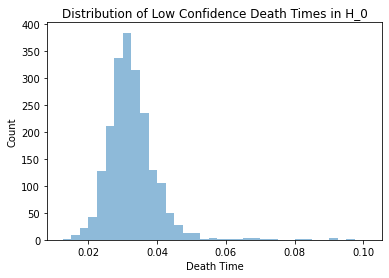

In [ ]:
# fixed bin size
bins = np.arange(0, 0.1, 0.0025) # fixed bin size

plt.xlim([min(b_H0_low_pts)-0.005, max(b_H0_high_pts)+0.005])

plt.hist(b_H0_low_pts, bins=bins, alpha=0.5)
plt.title('Distribution of Low Confidence Death Times in H_0')
plt.xlabel('Death Time')
plt.ylabel('Count')

plt.show()

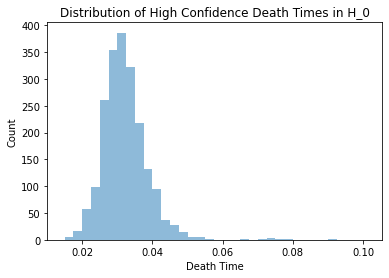

In [ ]:
# fixed bin size
bins = np.arange(0, 0.1, 0.0025) # fixed bin size

plt.xlim([min(b_H0_high_pts)-0.005, max(b_H0_high_pts)+0.005])

plt.hist(b_H0_high_pts, bins=bins, alpha=0.5)
plt.title('Distribution of High Confidence Death Times in H_0')
plt.xlabel('Death Time')
plt.ylabel('Count')

plt.show()

In [ ]:
f_oneway(b_H0_high_pts,b_H0_low_pts)

F_onewayResult(statistic=3.985494535563336, pvalue=0.045959805180713686)

### Birth $H_1$

In [ ]:
sum = 0
num_pts = 63 * 33

for dgms in dgms_list_low:
    for i in range(len(dgms[1])):
        if dgms[1][i][0] != inf:
            sum += dgms[1][i][0]
print("low confidence avg birth in H_1:", sum/num_pts)

low confidence avg birth in H_1: 0.01862196232935395


In [ ]:
sum = 0
num_pts = 63 * 33
for dgms in dgms_list_high:
    for i in range(len(dgms[1])):
        if dgms[1][i][0] != inf:
            sum += dgms[1][i][0]
print("high confidence avg death in H_1:", sum/num_pts)

high confidence avg death in H_1: 0.020551705842245478


### Death $H_1$

In [ ]:
sum = 0
num_pts = 63 * 33

for dgms in dgms_list_low:
    for i in range(len(dgms[1])):
        if dgms[1][i][1] != inf:
            sum += dgms[1][i][1]
print("low confidence avg birth in H_1:", sum/num_pts)

low confidence avg birth in H_1: 0.019605825838380678


In [ ]:
sum = 0
num_pts = 63 * 33
for dgms in dgms_list_high:
    for i in range(len(dgms[1])):
        if dgms[1][i][1] != inf:
            sum += dgms[1][i][1]
print("high confidence avg death in H_1:", sum/num_pts)

high confidence avg death in H_1: 0.021624567564137855


In [ ]:
dists = []
for r in tqdm(itertools.product(dgms_list_low, dgms_list_high),desc='dgms', leave = False): 
    dists.append(sliced_wasserstein(r[0][1], r[1][1] ))

In [ ]:
max(dists)

0.04310989380733618

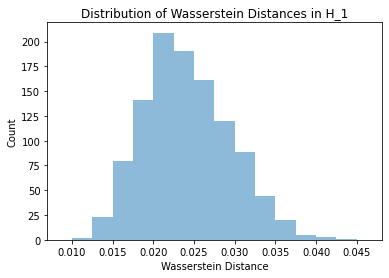

In [ ]:
# fixed bin size
bins = np.arange(0, 0.1, 0.0025) # fixed bin size

plt.xlim([min(dists)-0.005, max(dists)+0.005])

plt.hist(dists, bins=bins, alpha=0.5)
plt.title('Distribution of Wasserstein Distances in H_1')
plt.xlabel('Wasserstein Distance')
plt.ylabel('Count')

plt.show()

In [ ]:
np.mean(dists)

0.024150093499291325

In [ ]:
ttest_1samp(dists, popmean=0)

Ttest_1sampResult(statistic=151.5933372311013, pvalue=0.0)

In [ ]:
np.sqrt(np.var(dists))

0.0052547632071360895